# Model Development
In this section, we will develop several models that will predict the price of the car using the variables or features. This is just an estimate but should give us an objective idea of how much the car should cost.

Some questions we want to ask in this module
<ul>
    <li>do I know if the dealer is offering fair value for my trade-in?</li>
    <li>do I know if I put a fair value on my car?</li>
</ul>
<p>Data Analytics, we often use <b>Model Development</b> to help us predict future observations from the data we have.</p>

<p>A Model will help us understand the exact relationship between different variables and how these variables are used to predict the result.</p>

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [64]:
df = pd.read_csv('automobileEDA.csv')

In [65]:
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


<h2>1. Linear Regression and Multiple Linear Regression</h2>

<h4>Linear Regression</h4>
<p>One example of a Data  Model that we will be using is</p>
<b>Simple Linear Regression</b>.

<br>
<p>Simple Linear Regression is a method to help us understand the relationship between two variables:</p>
<ul>
    <li>The predictor/independent variable (X)</li>
    <li>The response/dependent variable (that we want to predict)(Y)</li>
</ul>

<p>The result of Linear Regression is a <b>linear function</b> that predicts the response (dependent) variable as a function of the predictor (independent) variable.</p>

$$
 Y: Response \ Variable\\
 X: Predictor \ Variables
$$

<ul>
    <li>a refers to the <b>intercept</b> of the regression line0, in other words: the value of Y when X is 0</li>
    <li>b refers to the <b>slope</b> of the regression line, in other words: the value with which Y changes when X increases by 1 unit</li>
</ul>



In [66]:
""" load the regression model """
from sklearn.linear_model import LinearRegression

In [67]:
""" create a linear regression object lm """
lm = LinearRegression()
lm

LinearRegression()

In [68]:
""" Loading Highway-mpg to see how we can use the data for price prediction """
X=df[["highway-mpg"]]
Y=df[["price"]]

In [69]:
X

,highway-mpg
0,27
1,27
2,26
3,30
4,22
...,...
196,28
197,25
198,23
199,27


In [70]:
lm.fit(X,Y)

LinearRegression()

In [71]:
Yhat = lm.predict(X)
Yhat[0:5]

array([[16236.50464347],
       [16236.50464347],
       [17058.23802179],
       [13771.3045085 ],
       [20345.17153508]])

In [72]:
lm.intercept_

array([38423.30585816])

In [73]:
lm.coef_

array([[-821.73337832]])

In [74]:
import seaborn as sns

<AxesSubplot:xlabel='highway-mpg', ylabel='price'>

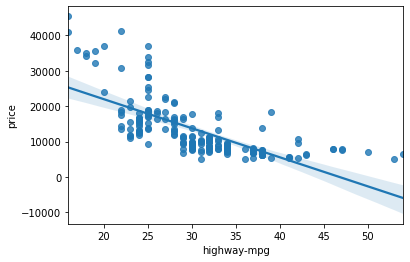

In [75]:
sns.regplot(x="highway-mpg",y="price",data=df)

In [76]:
""" Checking the same for the engine-size vs price """
lm2=LinearRegression()
lm2

LinearRegression()

In [77]:
lm2.fit(df[["engine-size"]],df["price"])

LinearRegression()

In [78]:
Yhat2 = lm2.predict(X)
Yhat[0:5]

array([[16236.50464347],
       [16236.50464347],
       [17058.23802179],
       [13771.3045085 ],
       [20345.17153508]])

## Multiple Linear Regression
<p>What if we want to predict car price using more than one variable?</p>

<p>If we want to use more variables in our model to predict car price, we can use <b>Multiple Linear Regression</b>.
Multiple Linear Regression is very similar to Simple Linear Regression, but this method is used to explain the relationship between one continuous response (dependent) variable and <b>two or more</b> predictor (independent) variables.
Most of the real-world regression models involve multiple predictors. We will illustrate the structure by using four predictor variables, but these results can generalize to any integer:</p>

$$
Y: Response \ Variable\\
X_1 :Predictor\ Variable \ 1\\
X_2: Predictor\ Variable \ 2\\
X_3: Predictor\ Variable \ 3\\
X_4: Predictor\ Variable \ 4\\
$$

$$
a: intercept\\
b_1 :coefficients \ of\ Variable \ 1\\
b_2: coefficients \ of\ Variable \ 2\\
b_3: coefficients \ of\ Variable \ 3\\
b_4: coefficients \ of\ Variable \ 4\\
$$


$$ Yhat = a + b_1 X_1 + b_2 X_2 + b_3 X_3 + b_4 X_4 $$

<p>From the previous section  we know that other good predictors of price could be:</p>
<ul>
    <li>Horsepower</li>
    <li>Curb-weight</li>
    <li>Engine-size</li>
    <li>Highway-mpg</li>
</ul>
Let's develop a model using these variables as the predictor variables.


In [79]:
Z=df[["horsepower","curb-weight","engine-size","highway-mpg"]]

In [80]:
mul=LinearRegression()
mul

LinearRegression()

In [81]:
mul.fit(Z,df["price"])

LinearRegression()

In [82]:
yhatt=mul.predict(Z)
yhatt[:5]

array([13699.11161184, 13699.11161184, 19051.65470233, 10620.36193015,
       15521.31420211])

In [83]:
mul.intercept_

-15806.624626329198

In [84]:
mul.coef_

array([53.49574423,  4.70770099, 81.53026382, 36.05748882])

## 2) Model Evaluation using Visualization

In [85]:
%matplotlib inline

## Regression Plot

<p>When it comes to simple linear regression, an excellent way to visualize the fit of our model is by using <b>regression plots</b>.</p>

<p>This plot will show a combination of a scattered data points (a <b>scatter plot</b>), as well as the fitted <b>linear regression</b> line going through the data. This will give us a reasonable estimate of the relationship between the two variables, the strength of the correlation, as well as the direction (positive or negative correlation).</p>

<AxesSubplot:xlabel='highway-mpg', ylabel='price'>

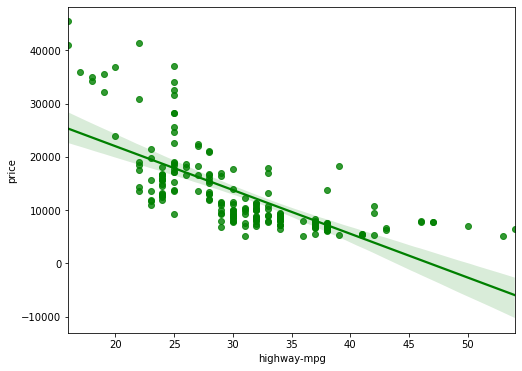

In [86]:
plt.figure(figsize=(8,6))
sns.regplot(x="highway-mpg",y="price",data=df,color="green")

<AxesSubplot:xlabel='peak-rpm', ylabel='price'>

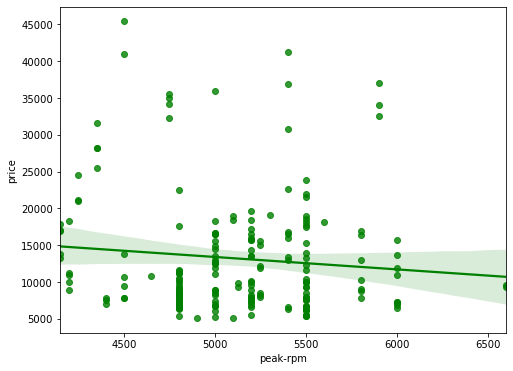

In [87]:
plt.figure(figsize=(8,6))
sns.regplot(x="peak-rpm",y="price",data=df,color='g')

In [88]:
df[["peak-rpm","highway-mpg","price"]].corr()

,peak-rpm,highway-mpg,price
peak-rpm,1.000000,-0.058598,-0.101616
highway-mpg,-0.058598,1.000000,-0.704692
price,-0.101616,-0.704692,1.000000


<h3>Residual Plot</h3>

<p>A good way to visualize the variance of the data is to use a residual plot.</p>

<p>What is a <b>residual</b>?</p>

<p>The difference between the observed value (y) and the predicted value (Yhat) is called the residual (e). When we look at a regression plot, the residual is the distance from the data point to the fitted regression line.</p>

<p>So what is a <b>residual plot</b>?</p>

<p>A residual plot is a graph that shows the residuals on the vertical y-axis and the independent variable on the horizontal x-axis.</p>

<p>What do we pay attention to when looking at a residual plot?</p>

<p>We look at the spread of the residuals:</p>

<p>- If the points in a residual plot are <b>randomly spread out around the x-axis</b>, then a <b>linear model is appropriate</b> for the data. Why is that? Randomly spread out residuals means that the variance is constant, and thus the linear model is a good fit for this data.</p>

<AxesSubplot:xlabel='highway-mpg', ylabel='price'>

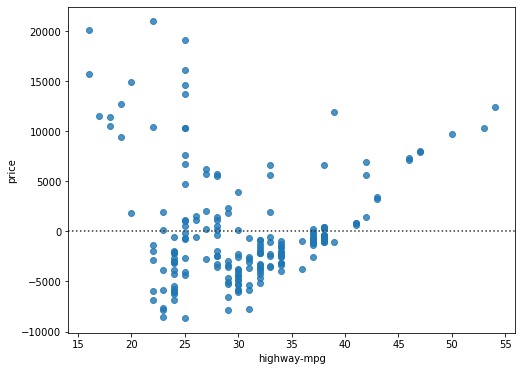

In [89]:
width = 8
height = 6
plt.figure(figsize=(width,height))
sns.residplot(x="highway-mpg",y="price",data=df)

### Multiple Linear Regression Visualization

How do we visualize a model for Multiple Linear Regression? This gets a bit more complicated because you can't visualize it with regression or residual plot.

One way to look at the fit of the model is by looking at the distribution plot: We can look at the distribution of the fitted values that result from the model and compare it to the distribution of the actual valu

In [90]:
yhatt=mul.predict(Z)

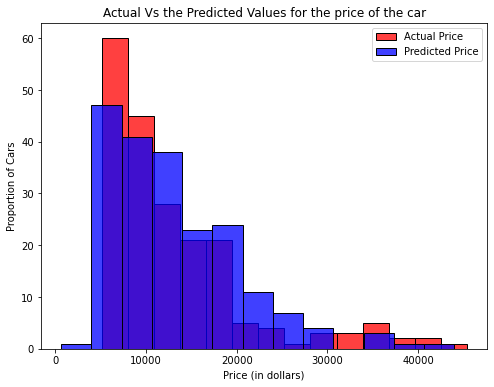

In [93]:
""" Multiple """
plt.figure(figsize=(8,6))
axl=sns.histplot(df["price"],color="r",label="Actual Price",kde=False)
sns.histplot(yhatt,color="b",label="Predicted Price",ax=axl,kde=False)

plt.title("Actual Vs the Predicted Values for the price of the car")
plt.xlabel("Price (in dollars)")
plt.ylabel("Proportion of Cars")

plt.legend(loc="best")
plt.show()
plt.close()

/Users/shivambhosale/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/shivambhosale/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


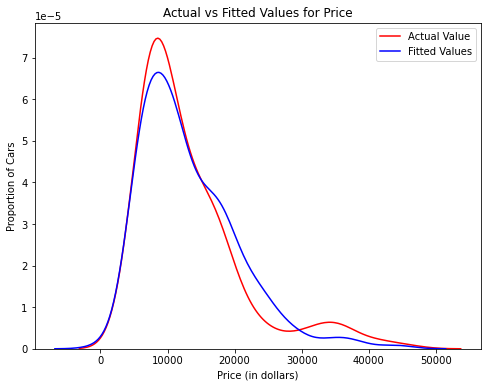

In [95]:
plt.figure(figsize=(width, height))
axl=sns.distplot(df["price"],hist=False,color='r',label="Actual Value")
sns.distplot(yhatt,hist=False,color='b',label="Fitted Values",ax=axl)

plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

plt.legend(loc="best")
plt.show()
plt.close()

/Users/shivambhosale/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/shivambhosale/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


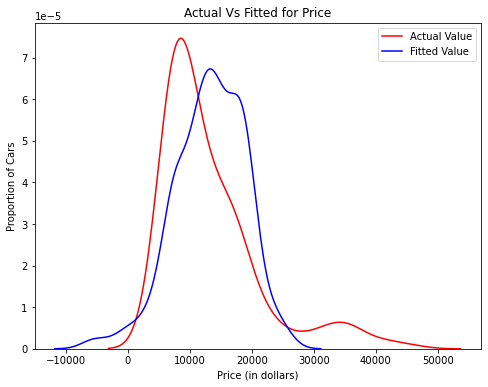

In [96]:
""" Linear """
plt.figure(figsize=(width,height))
axll=sns.distplot(df["price"],hist=False,label="Actual Value",color='r')
sns.distplot(Yhat,hist=False,label="Fitted Value",color="b")

plt.title("Actual Vs Fitted for Price")
plt.xlabel("Price (in dollars)")
plt.ylabel("Proportion of Cars")

plt.legend(loc="best")

## 3. Polynomial regression and Pipelines
<p><b>Polynomial regression</b> is a particular case of the general linear regression model or multiple linear regression models.</p> 
<p>We get non-linear relationships by squaring or setting higher-order terms of the predictor variables.</p>

<p>There are different orders of polynomial regression:</p>

<center><b>Quadratic - 2nd order</b></center>
$$
Yhat = a + b_1 X^2 +b_2 X^2 
$$


<center><b>Cubic - 3rd order</b></center>
$$
Yhat = a + b_1 X^2 +b_2 X^2 +b_3 X^3\\
$$


<center><b>Higher order</b>:</center>
$$
Y = a + b_1 X^2 +b_2 X^2 +b_3 X^3 ....\\

<p>We saw earlier that a linear model did not provide the best fit while using highway-mpg as the predictor variable. Let's see if we can try fitting a polynomial model to the data instead.</p>

In [97]:
def PlotPolly(model, independent_variable, dependent_variabble, Name):
    x_new=np.linspace(15,55,100)
    y_new=model(x_new)
    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title('Polynomial Fit with Matplotlib for Price ~ Length')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of Cars')

    plt.show()
    plt.close()

In [103]:
""" Defining the variables """ 
x = df["highway-mpg"]
y = df["price"]

In [104]:
#Let's fit the polynomial using the function polyfit, then use the function poly1d to display the polynomial function.
# Here we use a polynomial of the 3rd order (cubic)
f = np.polyfit(x, y, 4)
p = np.poly1d(f)
print(p)

         4        3       2
0.02651 x - 5.17 x + 382 x - 1.267e+04 x + 1.657e+05


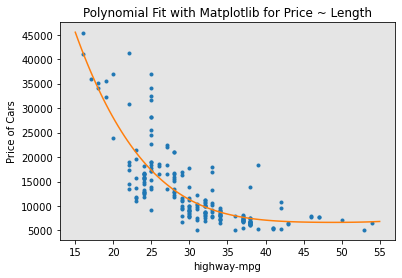

In [105]:
PlotPolly(p,x,y,'highway-mpg')

In [106]:
np.polyfit(x, y, 4)

array([ 2.65088385e-02, -5.17010163e+00,  3.81976935e+02, -1.26673852e+04,
        1.65673357e+05])

In [107]:
f1=np.polyfit(x,y,11)
p1=np.poly1d(f1)
print(p1)

            11             10             9           8         7
-1.243e-08 x  + 4.722e-06 x  - 0.0008028 x + 0.08056 x - 5.297 x
          6        5             4             3             2
 + 239.5 x - 7588 x + 1.684e+05 x - 2.565e+06 x + 2.551e+07 x - 1.491e+08 x + 3.879e+08


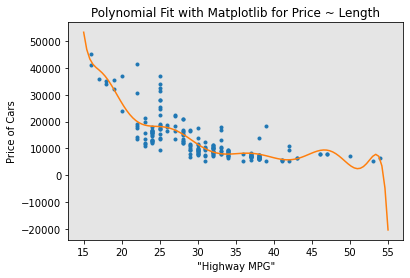

In [108]:
PlotPolly(p1,x,y,'"Highway MPG"')

The analytical expression for Multivariate Polynomial function gets complicated. For example, the expression for a second-order (degree=2)polynomial with two variables is given by:
$$
Yhat = a + b_1 X_1 +b_2 X_2 +b_3 X_1 X_2+b_4 X_1^2+b_5 X_2^2
$$

In [109]:
from sklearn.preprocessing import PolynomialFeatures

In [110]:
pr = PolynomialFeatures(degree=2)
pr

PolynomialFeatures()

In [111]:
Z_pr=pr.fit_transform(Z)

In [112]:
Z.shape

(201, 4)

In [113]:
Z_pr.shape

(201, 15)

### Pipeline

Data Pipelines simplify the steps of processing the data. We use the module Pipeline to create a pipeline. We also use StandardScaler as a step in our pipeline.


In [114]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [115]:
Input=[('scale',StandardScaler()),('polynomial', PolynomialFeatures(include_bias=False)),('model',LinearRegression())]

In [116]:
pipe = Pipeline(Input)
pipe

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [117]:
pipe.fit(Z,y)

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [118]:
ypipe=pipe.predict(Z)

In [119]:
ypipe[:5]

array([13102.74784201, 13102.74784201, 18225.54572197, 10390.29636555,
       16136.29619164])

/Users/shivambhosale/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/shivambhosale/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


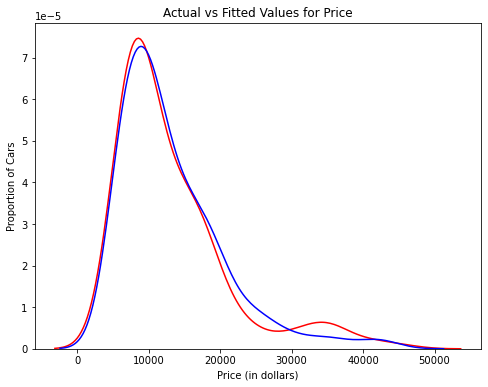

In [123]:
""" After Using Pipeline""" 
plt.figure(figsize=(width, height))
axl=sns.distplot(df["price"],hist=False,color='r',label="Actual Value")
sns.distplot(ypipe,hist=False,color='b',label="Fitted Values",ax=axl)

plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()

<h3>Part 4: Measures for In-Sample Evaluation</h3>

When evaluating our models, not only do we want to visualize the results, but we also want a quantitative measure to determine how accurate the model is.

Two very important measures that are often used in Statistics to determine the accuracy of a model are:

   <b> R^2 / R-squared
    <br>
       Mean Squared Error (MSE)</b>

<h3>R-squared</h3>

R squared, also known as the coefficient of determination, is a measure to indicate how close the data is to the fitted regression line.

The value of the R-squared is the percentage of variation of the response variable (y) that is explained by a linear model.

<h3>Mean Squared Error (MSE)</h3>

The Mean Squared Error measures the average of the squares of errors, that is, the difference between actual value (y) and the estimated value (ŷ).
Model 1: Simple Linear Regression.

## Model 1: Simple Linear Regression


In [124]:
"""Let's calculate the R^2"""
lm.fit(X,Y)

LinearRegression()

In [125]:
lm.score(X,Y)

0.4965911884339175

We can say that ~ 49.659% of the variation of the price is explained by this simple linear model "horsepower_fit".
Let's calculate the MSE

We can predict the output i.e., "yhat" using the predict method, where X is the input variable:

lets import the function mean_squared_error from the module metrics

In [127]:
from sklearn.metrics import mean_squared_error

In [128]:
mse = mean_squared_error(df["price"],Yhat)
print('The mean square error of price and predicted value is: ', mse)

The mean square error of price and predicted value is:  31635042.944639895


## Model 2: Multiple Linear Regression

In [129]:
# fit the model 
lm.fit(Z, df['price'])
# Find the R^2
print('The R-square is: ', lm.score(Z, df['price']))

The R-square is:  0.8093562806577457


In [130]:
Y_predict_multifit = lm.predict(Z)

In [131]:
mean_squared_error(df["price"],Y_predict_multifit)

11980366.87072649

## Model 3: Polynomial Fit

In [132]:
from sklearn.metrics import r2_score

In [133]:
r_squared = r2_score(y, p(x))
print('The R-square value is: ', r_squared)

The R-square value is:  0.6748405169870642


In [134]:
mean_squared_error(df['price'], p(x))

20433560.10589185